# Task 2a
Die folgenden Kapitel widmen sich der Datenvorbereitung der gecrawlten Textabschnitte mit Identifizierung von Named Entities und nicht-NE Touristenattraktionen sowie einem anschließenden Clustering der Dokumente nach den nicht-NE Touristenattraktionen.

----------------------------------

#### Inhaltsverzeichnis:
#### 1. [Text Preprocessing](#Text_prep)
#### 2. [Erstellen von Trainingsdaten](#Build_train_data)
#### 3. [Clustering](#Clustering)
#### 4. [Bonus: Automatisches mapping der NoNE zu Kategorien](#Bonus)
-----------------------------------------

##### Imports

In [88]:
from task2a_preprocessing import Preprocessing
from task2a_clustering import Clustering
import matplotlib.pyplot as plt

### 1. Text Preprocessing <a class="anchor" id="Text_prep"></a>
##### Vorbereiten der Daten auf das Training und ermitteln der nicht Named Entity Touristenattraktionen

In [2]:
prep_lemma = Preprocessing()
prep_lemma.preprocess_data('results_scrapping.csv', 'Lemmatization')

prep_stem = Preprocessing()
prep_stem.preprocess_data('results_scrapping.csv', 'Stemming')

C:\Users\jenni\.conda\envs\nlp_travel\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
C:\Users\jenni\.conda\envs\nlp_travel\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


### 2. Erstellen von Trainingsdaten <a class="anchor" id="Build_train_data"></a>
##### Erstellen von Trainingsdaten für verschiedene grams, preprocessing Schritte und Trainingsdatenvarianten

In [90]:
grams = ['1-grams','mixed-grams'] #,'2-grams'
matrix = ['TFIDF']#,'TFIDF_unique','True/False']
data_list = []

for g in grams:
    for m in matrix:
        data_list.append({'data':prep_lemma.create_train_data(g, m),
                          'wordreduction':'Lemmatization',
                          'grams':g,
                          'matrix':m})
        data_list.append({'data':prep_stem.create_train_data(g, m),
                          'wordreduction':'Stemming',
                          'grams':g,
                          'matrix':m})

C:\Users\jenni\GitHub\WI3_DataScience\Task 2\task2a_preprocessing.py:197: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.__df['grams'] = self.__df['no_NE_attractions_plain'].to_numpy()+np.array(p.grams_to_string(p.create_n_grams_to_list([self.__df['no_NE_attractions_plain']], 2)[0]))
C:\Users\jenni\GitHub\WI3_DataScience\Task 2\task2a_preprocessing.py:198: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.__df['grams_unique'] = self.__df['no_NE_attractions_plain_unique'].to_numpy() + np.array(
C:\Users\jenni\GitHub\WI3_DataScience\Task 2\task2a_

### 3. Clustering <a class="anchor" id="Clustering"></a>
##### Bestimmen des optimalen Clustering K's mithilfe der Elbow und Silhouetten Methoden

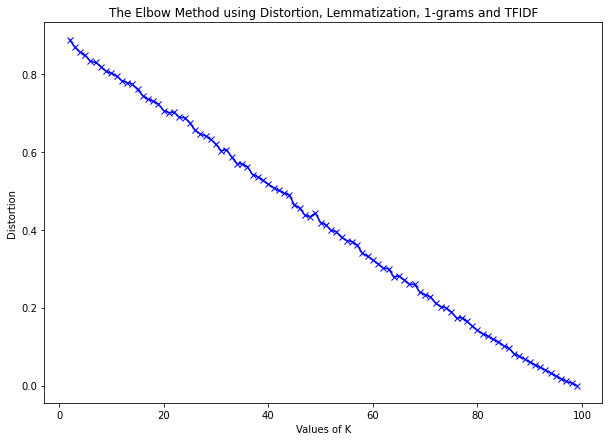

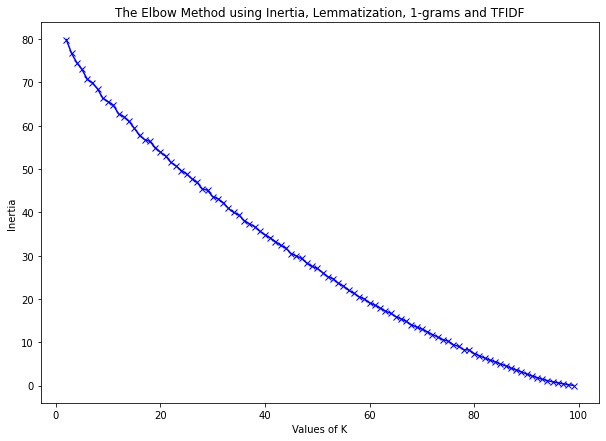

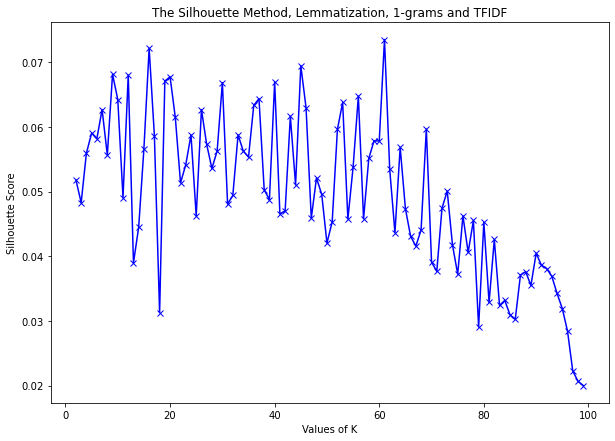

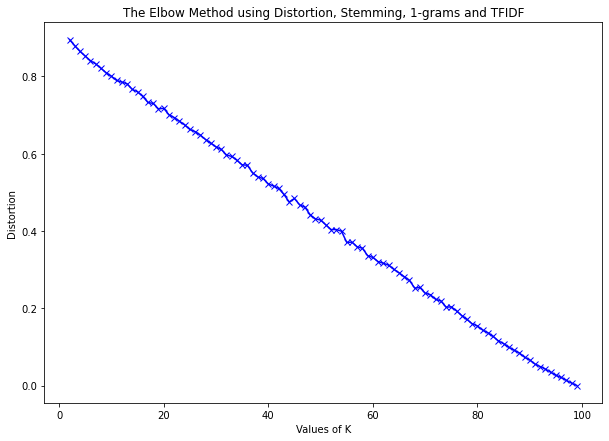

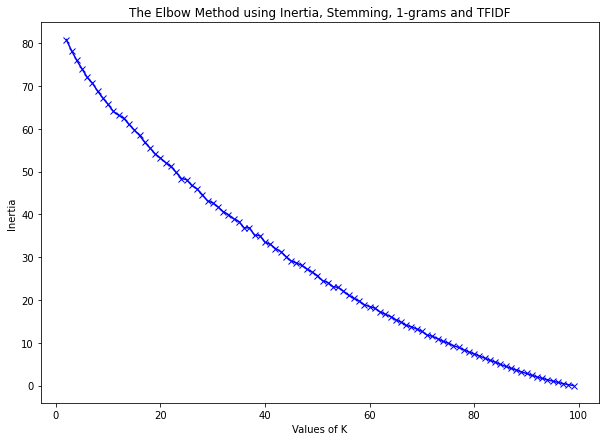

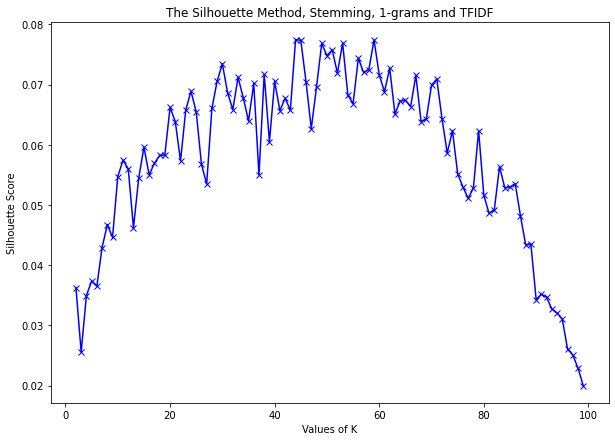

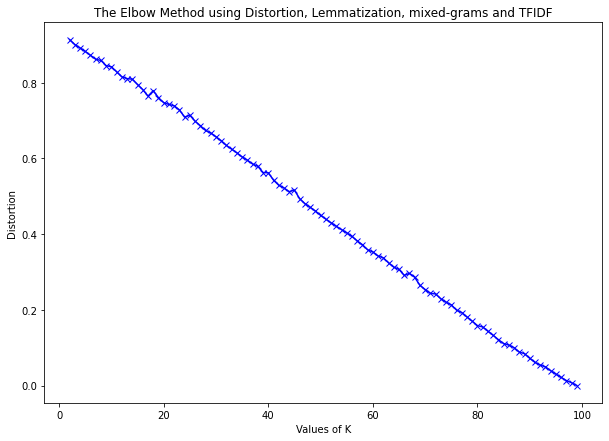

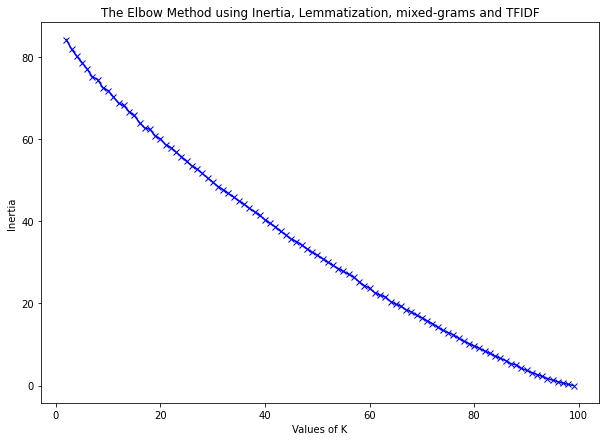

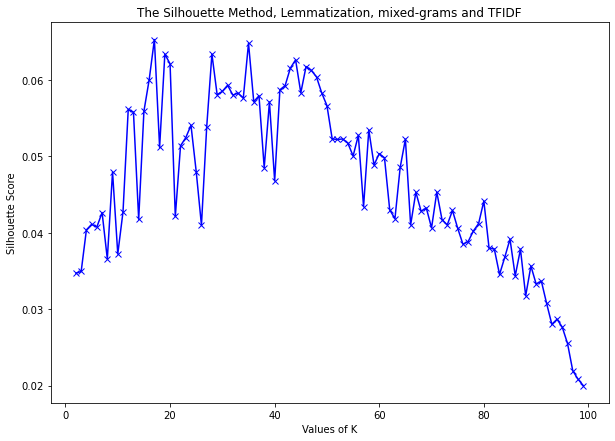

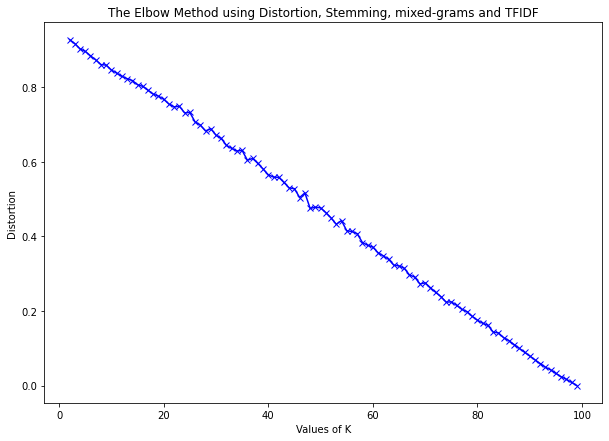

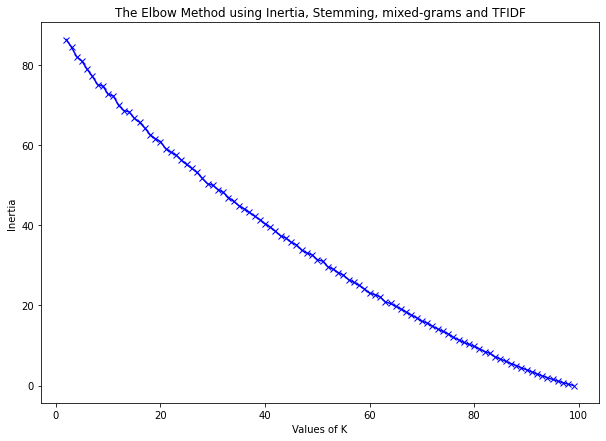

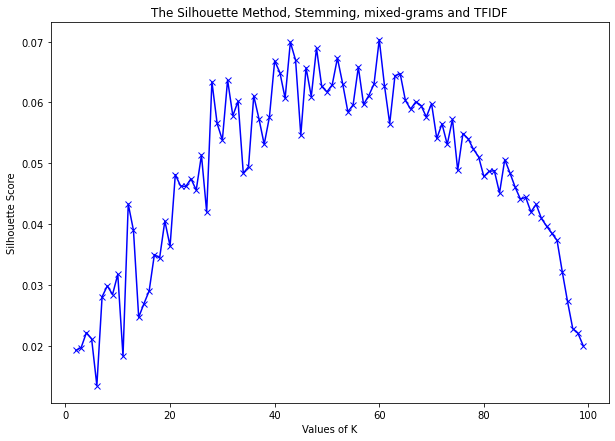

In [91]:
clustering = Clustering()
K, elbow_results = clustering.find_optimal_k(2,100,data_list)

for ele in elbow_results:

    plt.plot(K, ele['distortions'], 'bx-')
    plt.xlabel('Values of K')
    plt.ylabel('Distortion')
    plt.title(f'The Elbow Method using Distortion, {ele["wordreduction"]}, {ele["grams"]} and {ele["matrix"]}')
    plt.savefig(f'The_Elbow_Method_using_Distortion_{ele["wordreduction"]}_{ele["grams"]}_and_{ele["matrix"].replace("/","_")}.png')
    plt.show()

    plt.plot(K, ele['inertias'], 'bx-')
    plt.xlabel('Values of K')
    plt.ylabel('Inertia')
    plt.title(f'The Elbow Method using Inertia, {ele["wordreduction"]}, {ele["grams"]} and {ele["matrix"]}')
    plt.savefig(f'The_Elbow_Method_using_Inertia_{ele["wordreduction"]}_{ele["grams"]}_and_{ele["matrix"].replace("/","_")}.png')
    plt.show()

    plt.plot(K, ele['silhouette_scores'], 'bx-')
    plt.xlabel('Values of K')
    plt.ylabel('Silhouette Score')
    plt.title(f'The Silhouette Method, {ele["wordreduction"]}, {ele["grams"]} and {ele["matrix"]}')
    plt.savefig(f'The_Silhouette_Method_{ele["wordreduction"]}_{ele["grams"]}_and_{ele["matrix"].replace("/","_")}.png')
    plt.show()


##### Abrufen der höchsten Silhouetten Scores für 1-grams und TFIDF

In [113]:
index=1
for i in elbow_results[0]['silhouette_scores']:
    if i > 0.065:
        print(f'Cluster size {index}: {i: .4f}')
    index += 1

Cluster size 8:  0.0681
Cluster size 11:  0.0680
Cluster size 15:  0.0722
Cluster size 18:  0.0671
Cluster size 19:  0.0677
Cluster size 29:  0.0668
Cluster size 39:  0.0670
Cluster size 44:  0.0695
Cluster size 60:  0.0735


##### Abrufen der höchsten Silhouetten Scores für mixed-grams und TFIDF

In [114]:
index=1
for i in elbow_results[2]['silhouette_scores']:
    if i > 0.06:
        print(f'Cluster size {index}: {i: .4f}')
    index += 1

Cluster size 16:  0.0653
Cluster size 18:  0.0633
Cluster size 19:  0.0621
Cluster size 27:  0.0634
Cluster size 34:  0.0648
Cluster size 42:  0.0615
Cluster size 43:  0.0626
Cluster size 45:  0.0617
Cluster size 46:  0.0612
Cluster size 47:  0.0604


##### Plotten der Silhouetten für mixed-grams und TFIDF

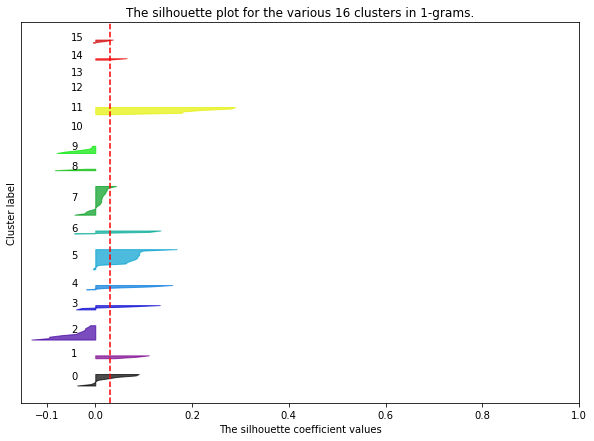

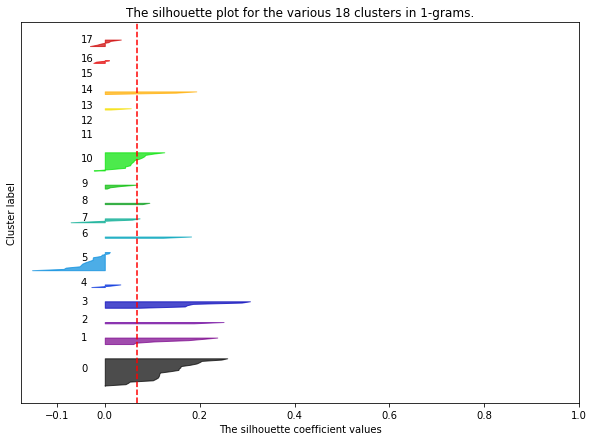

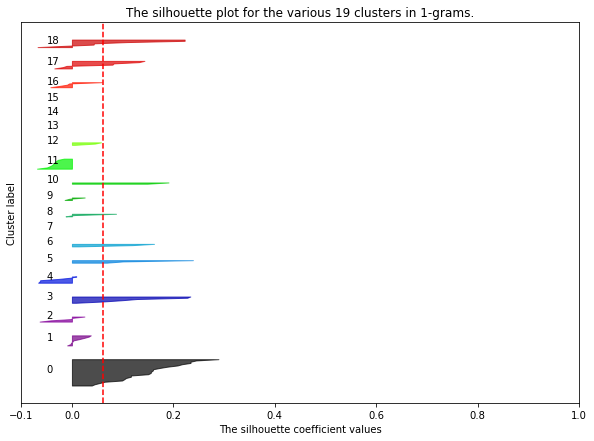

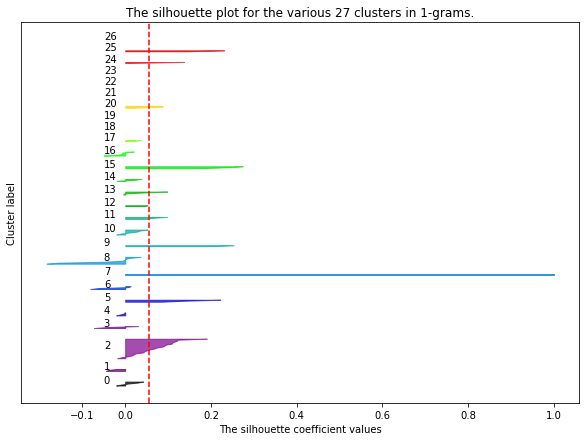

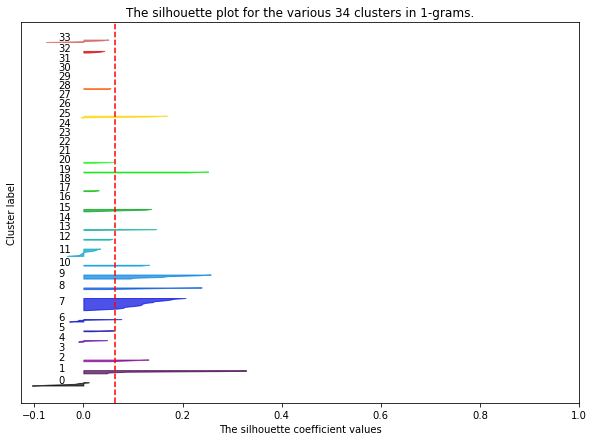

In [109]:
import matplotlib.cm as cm
import numpy as np
from matplotlib.pyplot import figure

clusters = [16,18,19,27,34]

for ele in [elbow_results[0]]:

    for x in clusters:
        y_lower = 10
        for i in range(x):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            cluster_labels = ele['labels'][x]
            ith_cluster_silhouette_values = ele['silhouette_values'][x][cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / x)
            plt.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        plt.title(f"The silhouette plot for the various {x} clusters in {ele['grams']}.")
        plt.xlabel("The silhouette coefficient values")
        plt.ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        plt.axvline(x=ele['silhouette_scores'][x], color="red", linestyle="--")

        plt.yticks([])  # Clear the yaxis labels / ticks
        plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.rcParams["figure.figsize"] = (10,7)
        plt.show()

##### Plotten der Silhouetten für 1-grams und TFIDF

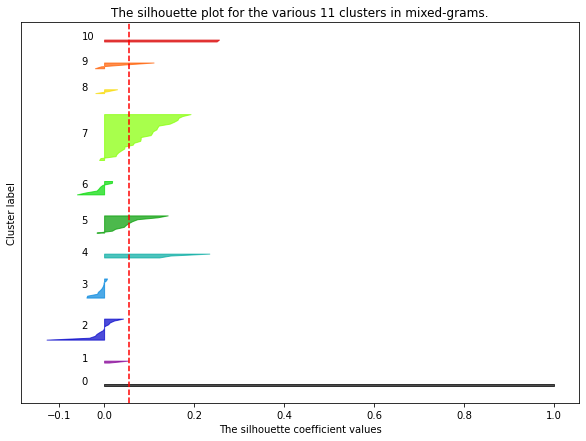

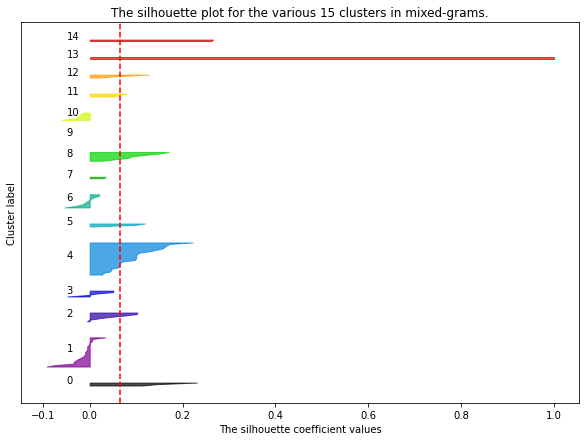

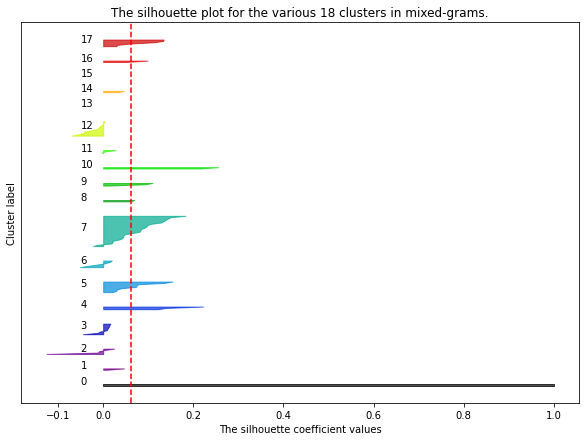

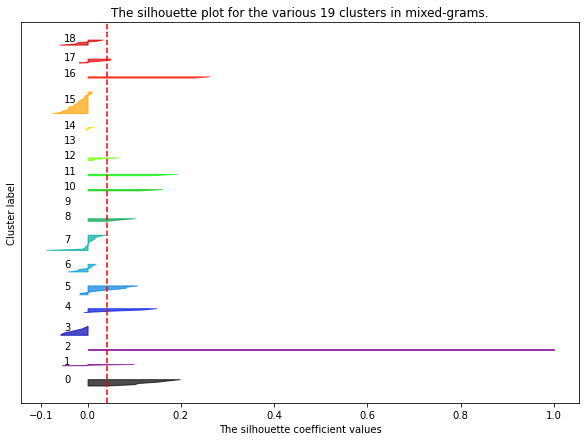

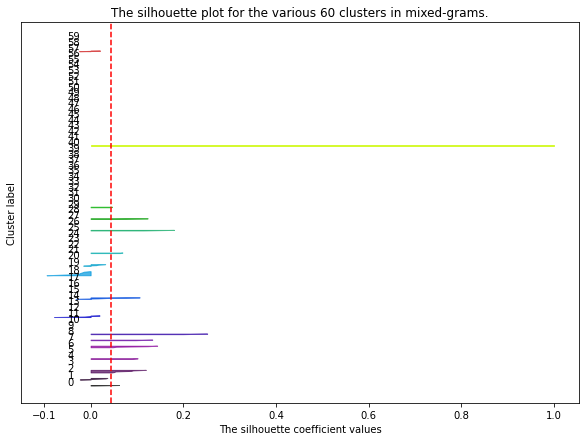

In [106]:
import matplotlib.cm as cm
import numpy as np
from matplotlib.pyplot import figure



clusters = [11,15,18,19,60]

for ele in [elbow_results[2]]:

    for x in clusters:
        y_lower = 10
        for i in range(x):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            cluster_labels = ele['labels'][x]
            ith_cluster_silhouette_values = ele['silhouette_values'][x][cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / x)
            plt.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        plt.title(f"The silhouette plot for the various {x} clusters in {ele['grams']}.")
        plt.xlabel("The silhouette coefficient values")
        plt.ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        plt.axvline(x=ele['silhouette_scores'][x], color="red", linestyle="--")

        plt.yticks([])  # Clear the yaxis labels / ticks
        plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.rcParams["figure.figsize"] = (10,7)
        plt.show()

##### Erstellen neuer Trainingsdaten basierend auf den Erkentnissen

In [59]:
grams = ['1-grams'] #,'2-grams'
matrix = ['TFIDF']#,'TFIDF_unique','True/False']
data_list = []

for g in grams:
    for m in matrix:
        data_list.append({'data':prep_lemma.create_train_data(g, m),
                          'wordreduction':'Lemmatization',
                          'grams':g,
                          'matrix':m})
        data_list.append({'data':prep_stem.create_train_data(g, m),
                          'wordreduction':'Stemming',
                          'grams':g,
                          'matrix':m})

##### Clustering mit Hyperparametern

In [81]:
hyperparameter_dict = {"cluster_types":["KMeans","DBSCAN","AffinityPropagation","AgglomerativeClustering","Birch","MiniBatchKMeans","MeanShift","OPTICS","SpectralClustering"],
                       "n_clusters":[15,18,19],
                       "eps":[1,1.5],
                       "damping":[0.5,0.75],
                       "threshold":[0.25,0.5],
                       "branching_factor":[25,50]}
df_results = clustering.run_clustering(data_list, hyperparameter_dict)

C:\Users\jenni\.conda\envs\nlp_travel\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\jenni\.conda\envs\nlp_travel\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\jenni\.conda\envs\nlp_travel\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP

In [82]:
df_results

,wordreduction,grams,matrix,n_cluster,train_data,cluster_type,eps,damping,threshold,branching_factor,labels
1,Lemmatization,1-grams,TFIDF,15.0,output/Lemmatization_1-grams_TFIDF.csv,KMeans,NaN,NaN,NaN,NaN,"[2, 6, 9, 14, 7, 9, 1, 4, 6, 4, 8, 1, 3, 8, 8,..."
2,Lemmatization,1-grams,TFIDF,18.0,output/Lemmatization_1-grams_TFIDF.csv,KMeans,NaN,NaN,NaN,NaN,"[11, 9, 6, 9, 5, 6, 7, 0, 13, 2, 16, 7, 0, 2, ..."
3,Lemmatization,1-grams,TFIDF,19.0,output/Lemmatization_1-grams_TFIDF.csv,KMeans,NaN,NaN,NaN,NaN,"[0, 10, 5, 10, 2, 6, 1, 2, 8, 11, 6, 1, 14, 6,..."
4,Lemmatization,1-grams,TFIDF,NaN,output/Lemmatization_1-grams_TFIDF.csv,DBSCAN,1.0,NaN,NaN,NaN,"[0, -1, -1, -1, -1, -1, 0, -1, -1, -1, -1, 0, ..."
5,Lemmatization,1-grams,TFIDF,NaN,output/Lemmatization_1-grams_TFIDF.csv,DBSCAN,1.5,NaN,NaN,NaN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6,Lemmatization,1-grams,TFIDF,NaN,output/Lemmatization_1-grams_TFIDF.csv,AffinityPropagation,NaN,0.50,NaN,NaN,"[11, 11, 0, 2, 10, 0, 6, 9, 1, 3, 2, 6, 9, 2, ..."
7,Lemmatization,1-grams,TFIDF,NaN,output/Lemmatization_1-grams_TFIDF.csv,AffinityPropagation,NaN,0.75,NaN,NaN,"[11, 11, 0, 2, 10, 0, 6, 9, 1, 3, 2, 6, 9, 2, ..."
8,Lemmatization,1-grams,TFIDF,15.0,output/Lemmatization_1-grams_TFIDF.csv,AgglomerativeClustering,NaN,NaN,NaN,NaN,"[10, 6, 9, 6, 1, 1, 7, 12, 8, 1, 0, 7, 5, 0, 0..."
9,Lemmatization,1-grams,TFIDF,18.0,output/Lemmatization_1-grams_TFIDF.csv,AgglomerativeClustering,NaN,NaN,NaN,NaN,"[10, 6, 9, 6, 12, 12, 15, 5, 8, 16, 7, 15, 2, ..."
10,Lemmatization,1-grams,TFIDF,19.0,output/Lemmatization_1-grams_TFIDF.csv,AgglomerativeClustering,NaN,NaN,NaN,NaN,"[10, 2, 9, 2, 12, 12, 15, 5, 8, 16, 7, 15, 0, ..."


##### Speichern der Ergebnisse

In [83]:
df_results.to_csv('output/results_2a.csv')

### 4. Bonus: Automatisches mapping der NoNE zu Kategorien <a class="anchor" id="Bonus"></a>
##### Abrufen des automatischen Mappings zu den Kategorien aus der Preprocessing Klasse

In [47]:
df_mapping_lemma = prep_lemma.df_mapping
df_mapping_stem = prep_stem.df_mapping

##### Speichern des automatischen Mappings

In [48]:
df_mapping_lemma.to_csv('output/mapping_data_lemma.csv')
df_mapping_stem.to_csv('output/mapping_data_stem.csv')

In [116]:
df_mapping_stem.iloc[-3:,:]

,Link,Place,Content,Country,Continent,no_NE_attractions,no_NE_attractions_plain
97,https://www.roughguides.com/spain/andalucia/ma...,Málaga,MÁLAGA seems at first an uninviting place. It’...,spain,Europe,"[(approach, other_attraction), (zone, architec...","[approach, zone, store, ha, hill, town, citade..."
98,https://www.roughguides.com/spain/the-balearic...,Ibiza,"IBIZA, or Eivissa in Catalan, is an island of ...",spain,Europe,"[(island, geographic_attraction), (cove, geogr...","[island, cove, beach, forest, island, ha, isla..."
99,https://www.roughguides.com/spain/valencia/the...,The Costa Blanca,"Stretching south of Valencia, the Costa Blanca...",spain,Europe,"[(beach, geographic_attraction), (town, archit...","[beach, town, town, beach, sprawl, town, cape,..."
